In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
train_data=pd.read_excel(r'Data_Train.xlsx')

In [12]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [13]:
pd.set_option('display.max_columns',None)

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
train_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [16]:
train_data.shape

(10683, 11)

In [17]:
train_data.isnull().mean()

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000094
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000094
Additional_Info    0.000000
Price              0.000000
dtype: float64

### Very less NaN values therefore we can drop the NaNs

In [18]:
train_data.dropna(inplace=True)
train_data.shape

(10682, 11)

# DATA PREPROCESSING


#### Date of Journey
We need to convert string type date and extract date and month 
since we are having one year data we are not considering year

In [19]:
train_data['Journey day']=pd.to_datetime(train_data.Date_of_Journey).dt.day
train_data['Journey month']=pd.to_datetime(train_data.Date_of_Journey).dt.month

In [20]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

 #### Departure Time

In [21]:
train_data['Dept_hour']=pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dept_minute']=pd.to_datetime(train_data.Dep_Time).dt.minute

In [22]:
train_data.drop('Dep_Time',axis=1,inplace=True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey day,Journey month,Dept_hour,Dept_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


#### Arrival TIme


In [24]:
train_data['arr_hour']=pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['arr_minute']=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [25]:
train_data.drop('Arrival_Time',axis=1,inplace=True)

In [26]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey day,Journey month,Dept_hour,Dept_minute,arr_hour,arr_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


#### Duration

In [27]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+"0m"
        else:
            duration[i]="0h"+duration[i]

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(duration[i].split(sep='m')[0].split(sep='h')[-1])

        

In [28]:
duration_mins

[' 50',
 ' 25',
 '0',
 ' 25',
 ' 45',
 ' 25',
 ' 30',
 ' 5',
 ' 30',
 ' 50',
 ' 15',
 ' 35',
 ' 15',
 ' 10',
 ' 35',
 ' 35',
 ' 30',
 ' 35',
 '0',
 ' 35',
 ' 10',
 ' 20',
 ' 50',
 ' 55',
 ' 20',
 ' 10',
 ' 45',
 ' 55',
 ' 50',
 ' 15',
 ' 15',
 ' 25',
 ' 50',
 '0',
 ' 30',
 ' 25',
 ' 15',
 ' 30',
 ' 15',
 ' 55',
 ' 5',
 ' 30',
 ' 5',
 ' 45',
 '0',
 ' 50',
 ' 50',
 ' 15',
 ' 5',
 ' 55',
 ' 15',
 ' 20',
 ' 50',
 '0',
 ' 50',
 ' 15',
 ' 5',
 ' 15',
 ' 30',
 ' 5',
 ' 25',
 ' 20',
 ' 15',
 ' 30',
 ' 15',
 ' 25',
 ' 50',
 ' 30',
 ' 20',
 ' 15',
 ' 25',
 ' 30',
 ' 20',
 ' 30',
 '0',
 ' 45',
 ' 50',
 ' 30',
 ' 5',
 ' 15',
 ' 50',
 ' 40',
 ' 10',
 ' 35',
 '0',
 ' 20',
 ' 25',
 ' 45',
 ' 20',
 '0',
 ' 15',
 ' 5',
 ' 30',
 ' 20',
 ' 35',
 ' 25',
 ' 40',
 '0',
 ' 25',
 ' 35',
 ' 20',
 ' 15',
 ' 30',
 '0',
 ' 45',
 ' 55',
 ' 10',
 ' 30',
 ' 20',
 ' 55',
 '0',
 ' 55',
 ' 45',
 ' 10',
 ' 55',
 ' 25',
 ' 5',
 ' 10',
 ' 40',
 ' 55',
 ' 40',
 ' 25',
 ' 5',
 ' 15',
 ' 25',
 ' 10',
 ' 10',
 '0',
 ' 50',
 '

In [29]:
train_data['Duration hours']=duration_hours
train_data['Duration mins']=duration_mins

In [30]:
train_data.drop('Duration',axis=1,inplace=True)

# CATEGORICAL DATA

### Airline

In [31]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

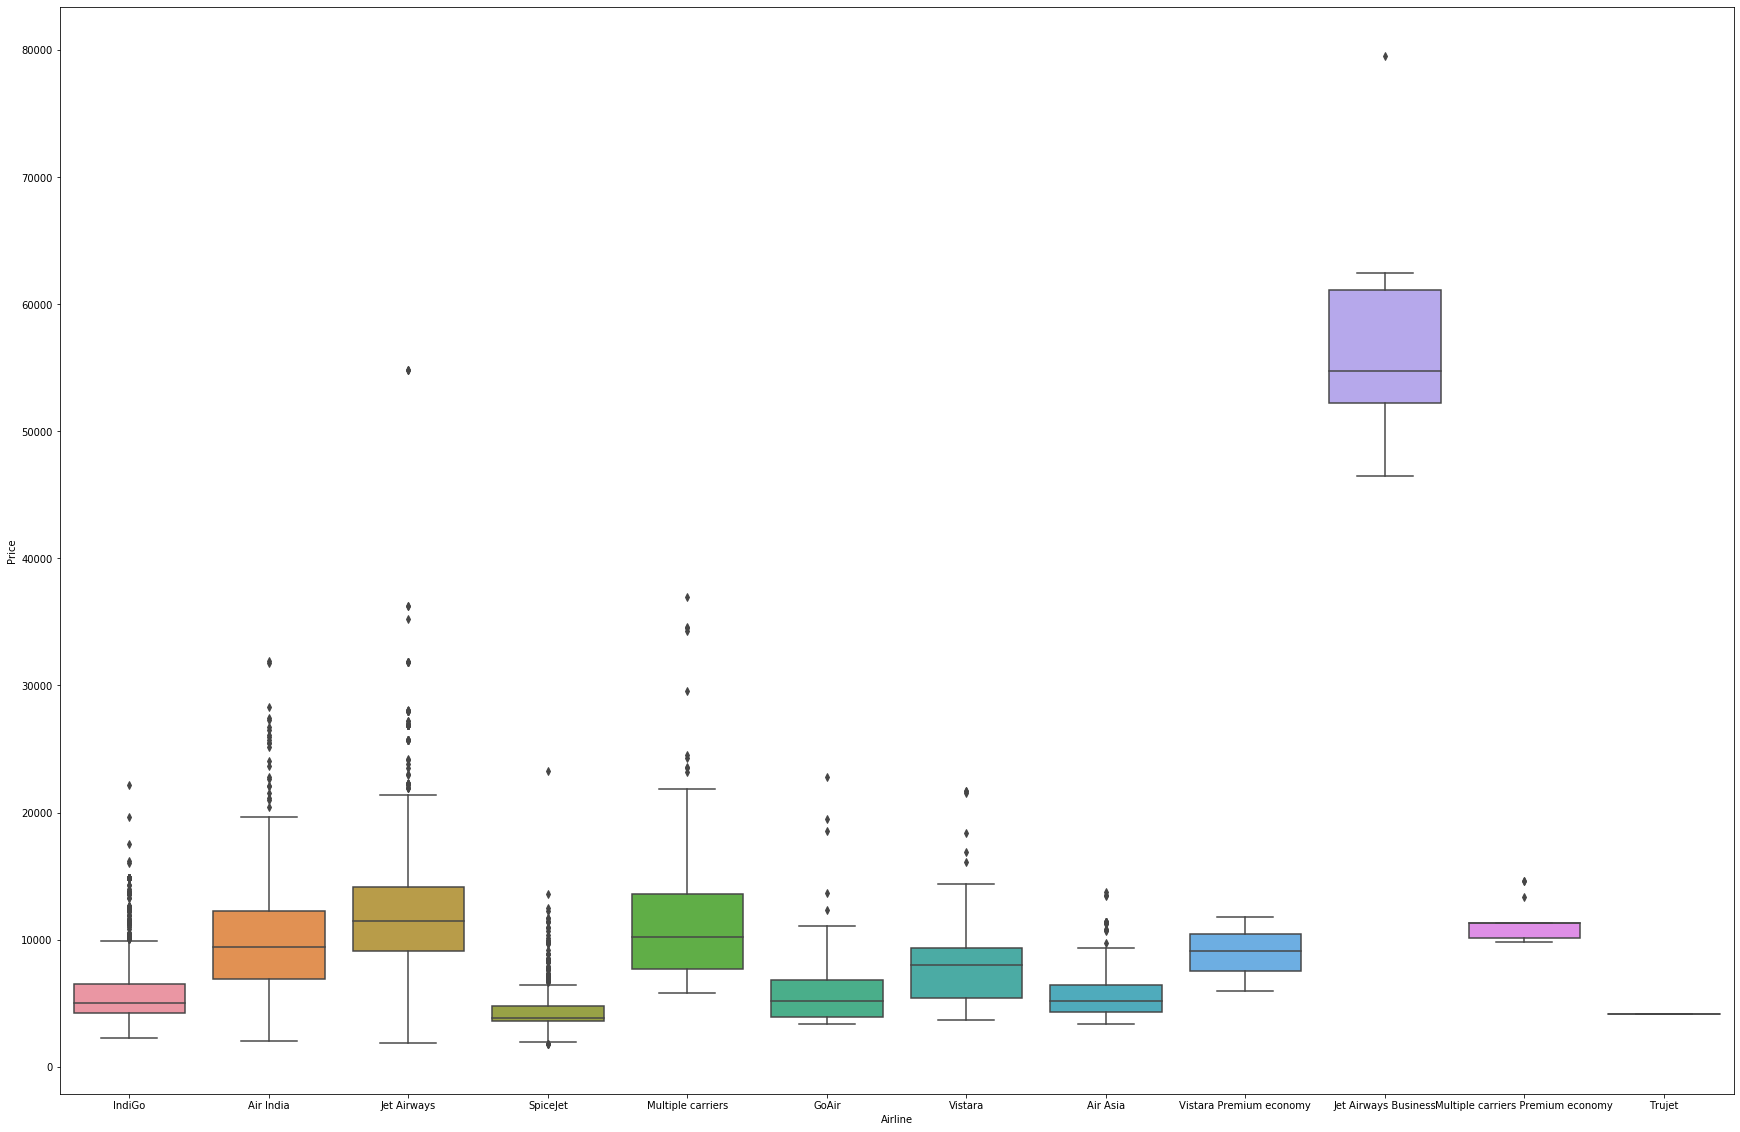

In [32]:
plt.figure(figsize=(30,20))
sns.boxplot(x='Airline',y='Price',data=train_data)


### Jet Airways Buisness having the maximum price and all others having almost the same price and many features having outliers and since it is a nominal feature we have to perform one hot encoding


In [33]:
Airline=train_data.Airline
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Source

In [34]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

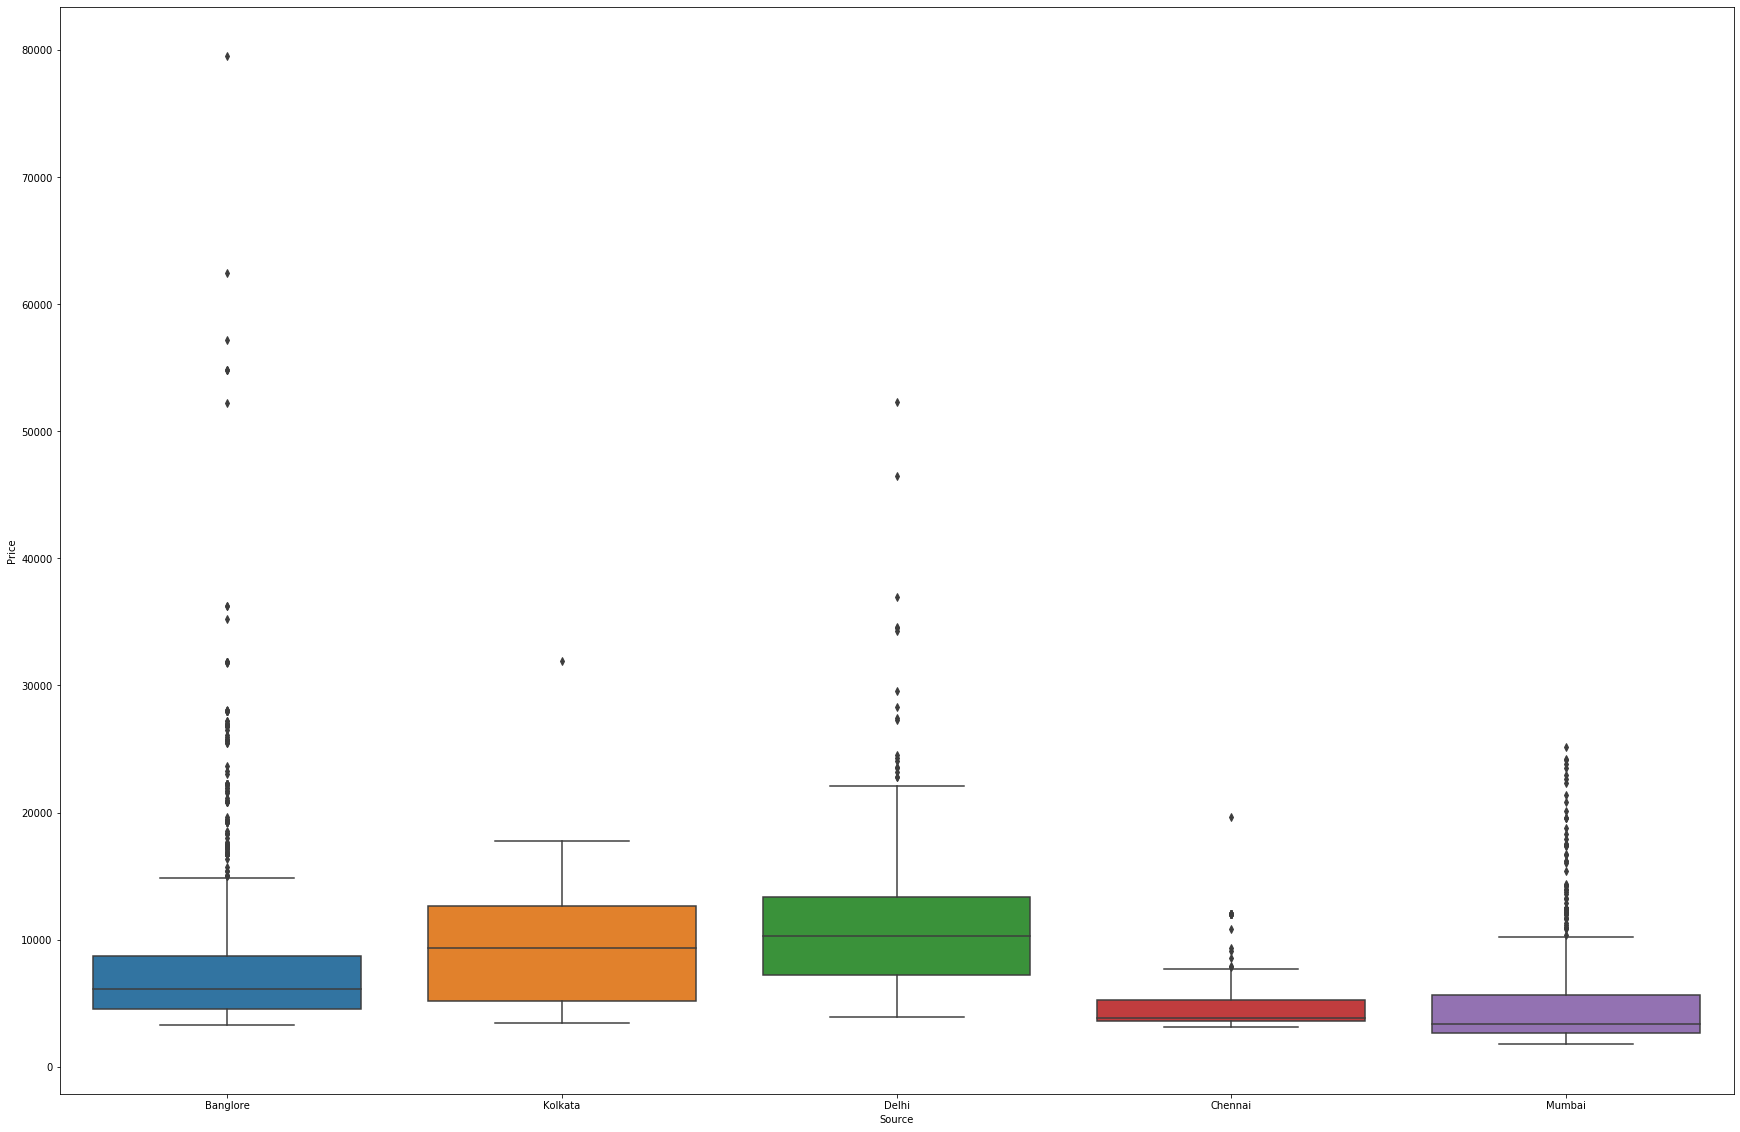

In [35]:
plt.figure(figsize=(30,20))
sns.boxplot(x='Source',y='Price',data=train_data)

### Outliers are present but more or less similar prices One hot encoding since a nominal feature

In [36]:
Source=train_data.Source
Source=pd.get_dummies(Source,drop_first=True)
Source.head()
Source.columns=['source_Chennai','source_Delhi','source_Kolkata','source_Mumbai']
Source

,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


### Destination

In [37]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

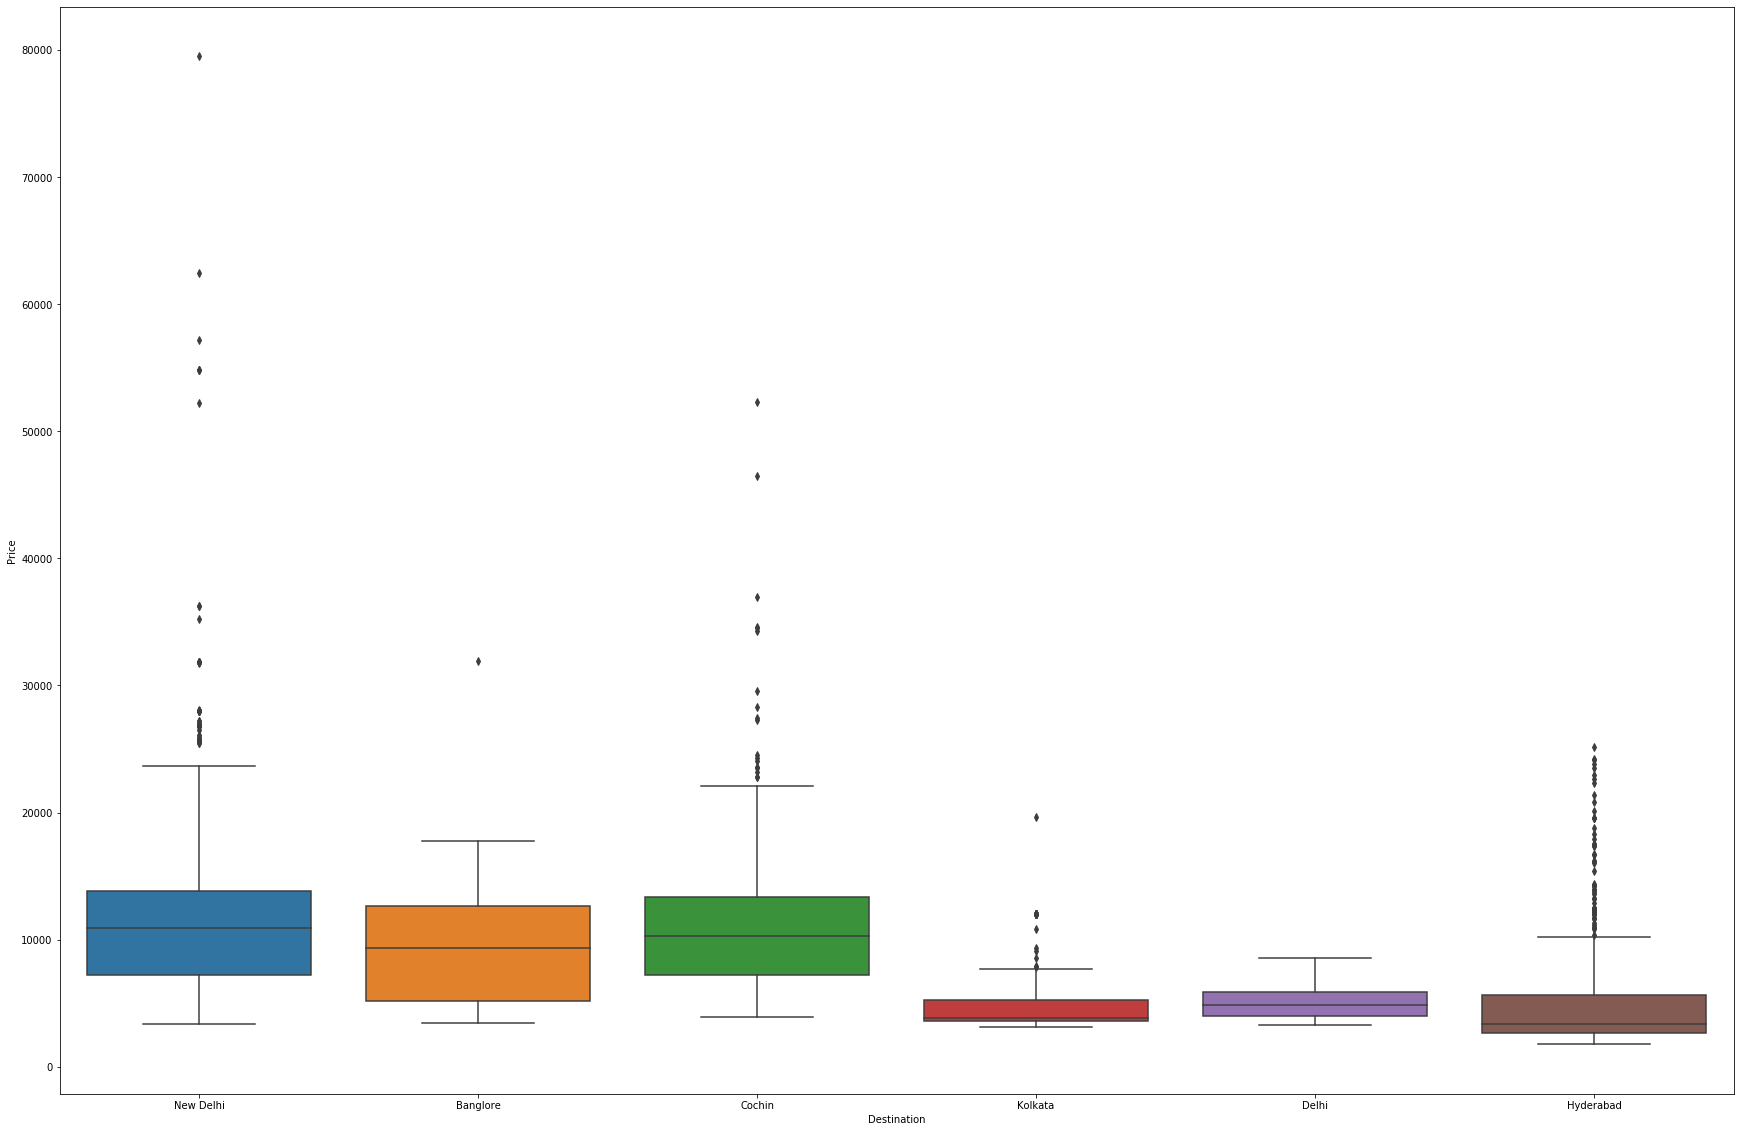

In [38]:
plt.figure(figsize=(30,20))
sns.boxplot(x='Destination',y='Price',data=train_data)

In [39]:
Dest=train_data.Destination
Dest=pd.get_dummies(Dest,drop_first=True)
Dest.head()
Dest.columns=['Dest_Cochin','Dest_Delhi','Dest_Hyderabad','Dest_Kolkata','Dest_New Delhi']

### Stops

In [40]:
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

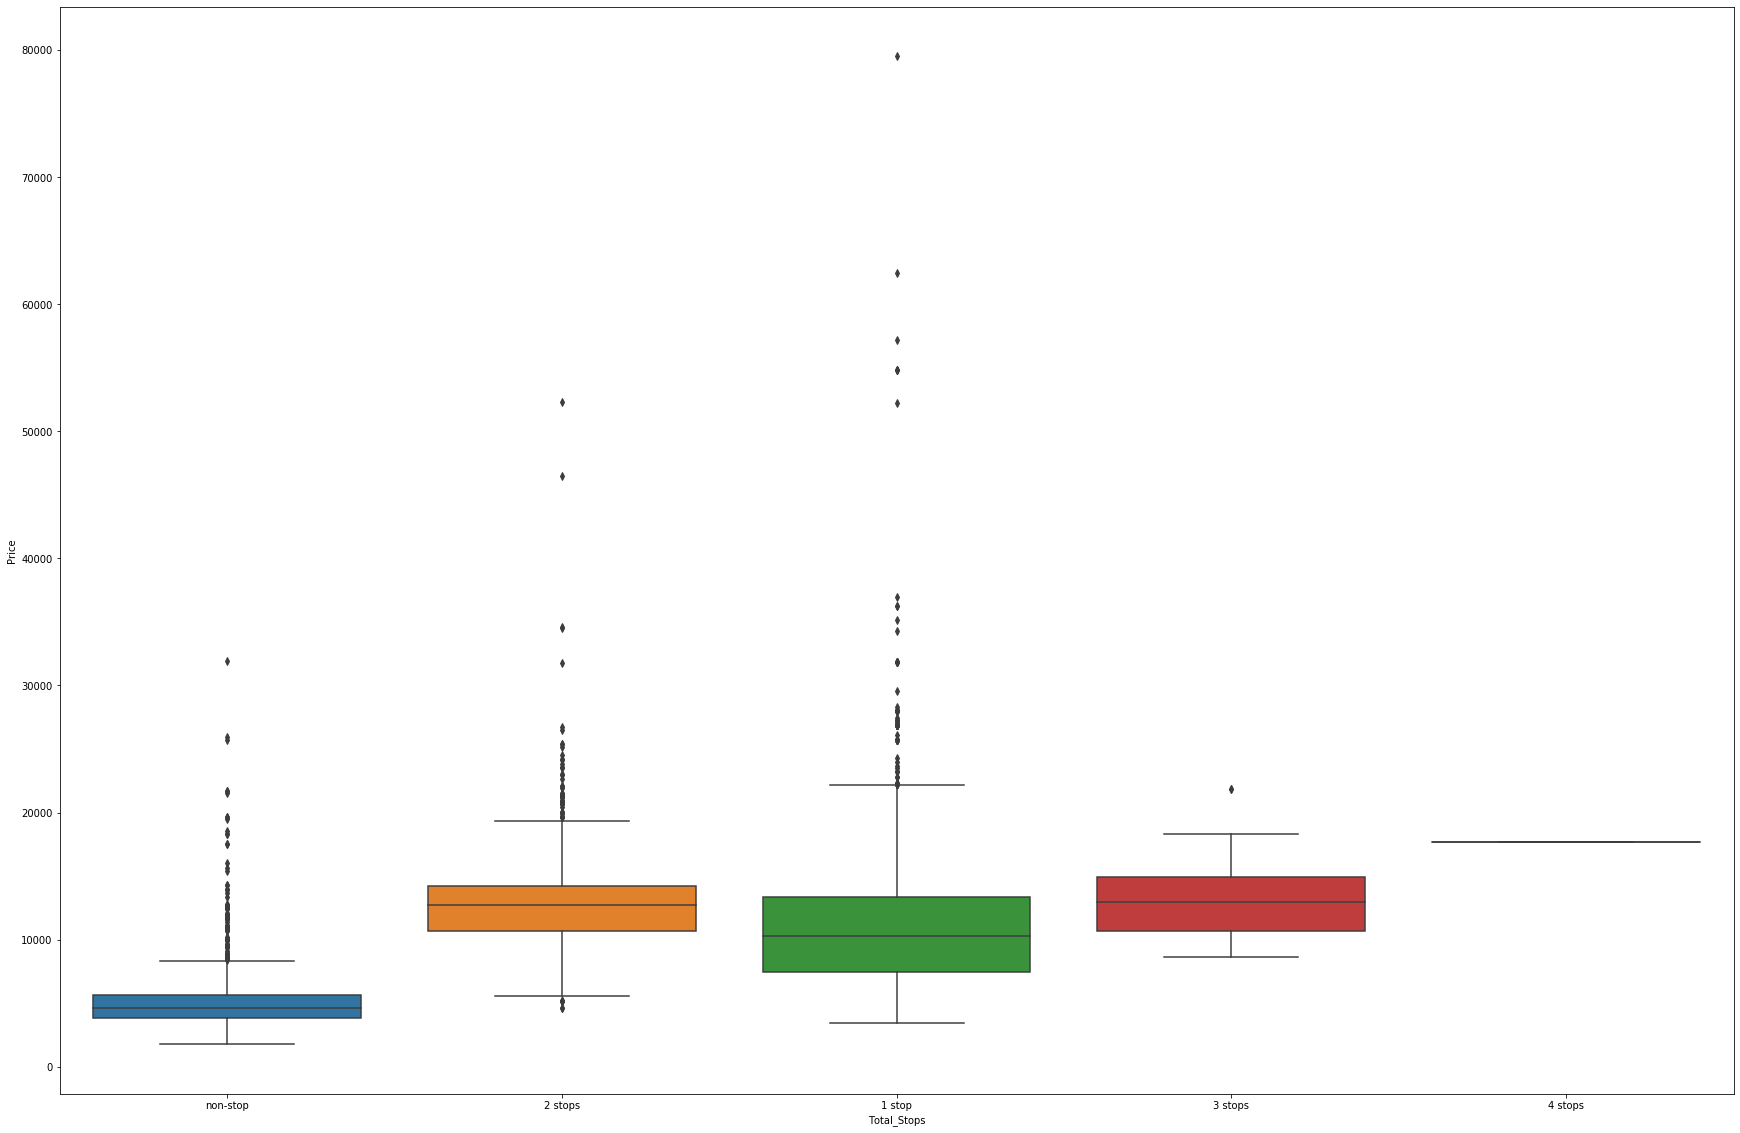

In [41]:
plt.figure(figsize=(30,20))
sns.boxplot(x='Total_Stops',y='Price',data=train_data)

In [42]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

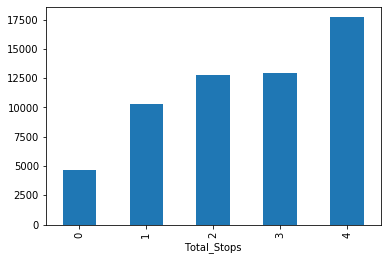

In [43]:
train_data.groupby('Total_Stops')['Price'].median().plot(kind='bar')

In [44]:
data_train=pd.concat([train_data,Airline,Source,Dest],axis=1)

In [45]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

### Additional Info has 80 percent no information and route is same as total stops

In [46]:
data_train.drop(['Route','Additional_Info'],axis=1,inplace=True)

# FEATURE SELECTION

Methods are KBest,Feature importance,correlation 

In [47]:
data_train.shape

(10682, 30)

In [48]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey day', 'Journey month', 'Dept_hour',
       'Dept_minute', 'arr_hour', 'arr_minute', 'Duration hours',
       'Duration mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'source_Chennai', 'source_Delhi',
       'source_Kolkata', 'source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', 'Dest_New Delhi'],
      dtype='object')

In [49]:
X=data_train.loc[:,['Total_Stops','Journey day', 'Journey month', 'Dept_hour',
       'Dept_minute', 'arr_hour', 'arr_minute', 'Duration hours',
       'Duration mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'source_Chennai', 'source_Delhi',
       'source_Kolkata', 'source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', 'Dest_New Delhi']]
y=data_train.loc[:,'Price']

In [50]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

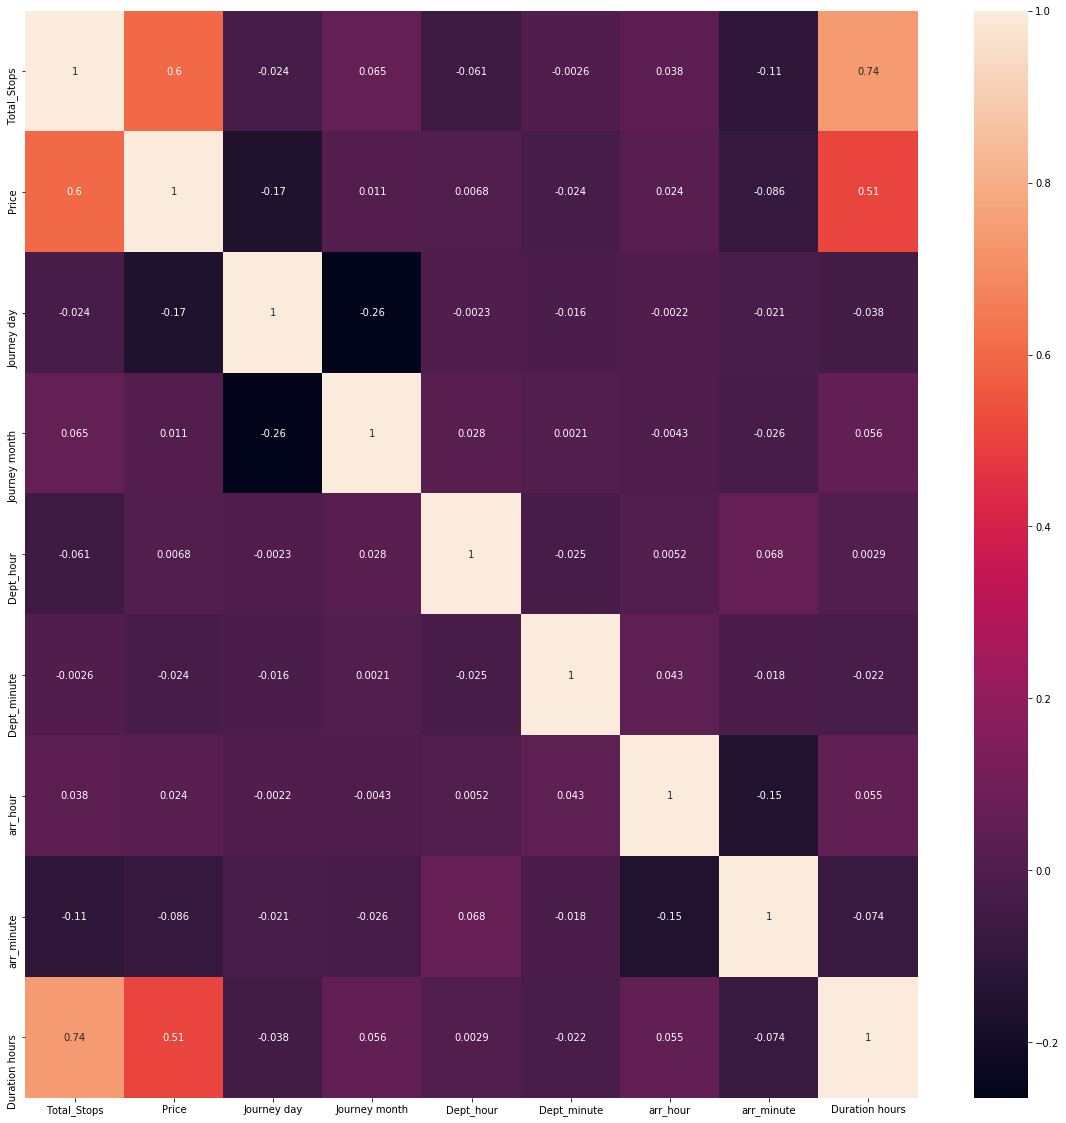

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True)

In [52]:
#ExtraTree Regressor 
from sklearn.ensemble import ExtraTreesRegressor
select_features=ExtraTreesRegressor()
select_features.fit(X,y)

ExtraTreesRegressor()

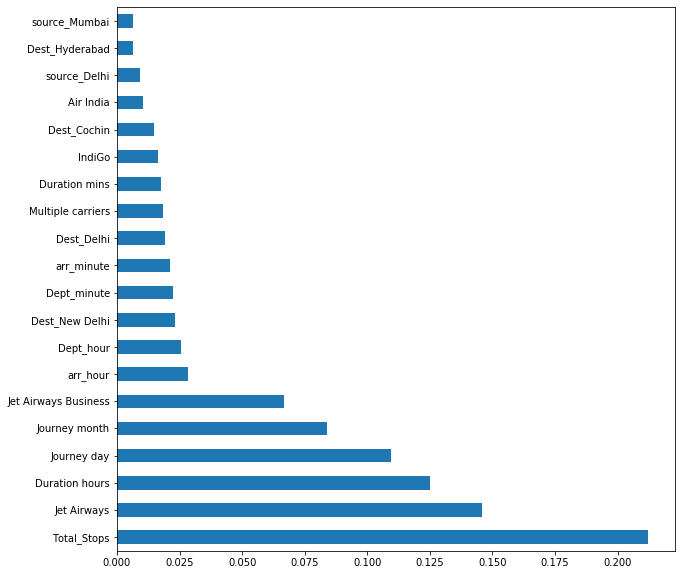

In [53]:
plt.figure(figsize=(10,10))
feature_importance=pd.Series(select_features.feature_importances_,index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')

# FITTING MODELS 
RANDOM FOREST

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [57]:
y_pred=reg_rf.predict(X_test)

In [58]:
reg_rf.score(X_train,y_train)

0.9522429119899142

In [59]:
reg_rf.score(X_test,y_test)

0.7881378800139772

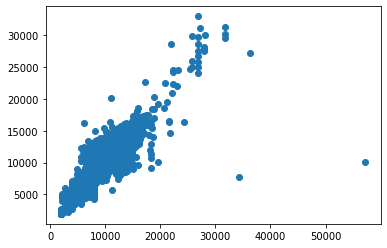

In [60]:
plt.scatter(y_test,y_pred)

# HYPERPARAMETER TUNING


In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1300,num=13)]
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [63]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
             
            

In [64]:
rf_rand=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,verbose=2,n_jobs=1)

In [65]:
rf_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   5.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   5.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   5.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=20, total=   6.3s
[CV] n_estimators=1000, min_samples_split=2

[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.2s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.5s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.2s
[CV] n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.7s
[CV] n_estimators=1000, min_samples_split=2

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300]},
                   scoring='neg_mean_squared_error', verbose=2)

In [66]:
rf_rand.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [67]:
rf_rand.best_estimator_

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=15,
                      n_estimators=400)

In [68]:
prediction=rf_rand.predict(X_test)

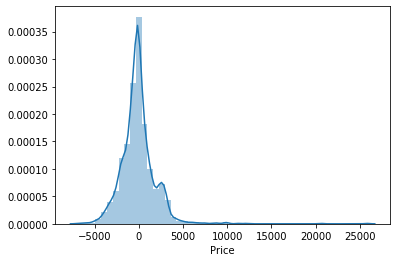

In [70]:
sns.distplot(y_test-prediction)

In [72]:
prediction

array([16231.2106005 ,  6494.95084856,  8694.22940614, ...,
        7217.99665029, 11923.28473728, 12434.40044669])

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,

In [77]:
print('MAE after',mean_absolute_error(y_test,prediction))
print('MSE after ',mean_squared_error(y_test,prediction))
print('R2 after',r2_score(y_test,prediction))

MAE after 1308.0510645381783
MSE after  3831182.4823971367
R2 after 0.8223183158044147


In [76]:
print('MAE before',mean_absolute_error(y_test,y_pred))
print('MSE before ',mean_squared_error(y_test,y_pred))
print('R2 before',r2_score(y_test,y_pred))

MAE before 1198.2567475255207
MSE before  4568182.964094945
R2 before 0.7881378800139772
